In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import pandas as pd
import numpy as np
from pred_utils import *

<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


# Part 1: Process predictions from model

In [2]:
df = pd.read_csv('../out/extended_screen_set_32FINAL_predictions_05_01_2022.csv')
df = df[df['hit_kill'] > 0.1]
smis = list(df['SMILES'])

print("Computing tanimoto scores against abx...")
abx = pd.read_csv('../data/curated_set_of_566_abx.csv')
df = compute_tanimoto_against_dataset(smis, df, abx, dataset_name = 'abx', smi_col='Smiles', name_col = 'Name')

print("Computing tanimoto scores against training set...")
ts = pd.read_csv('../out/final_model_after_validation/primary_plus_ml_val_fullset.csv')
ts = ts[ts['hit_kill'] == 1] # only train set killing hits
df = compute_tanimoto_against_dataset(smis, df, ts, dataset_name = 'train set', smi_col='SMILES', name_col = 'Name')

df.to_csv('../out/extended_set_predictions/inh01_preds_with_tanimoto_analysis.csv', index = False)
df

Computing tanimoto scores against abx...
Computing tanimoto scores against training set...


,SMILES,tanimoto similarity to closest train set,closest train set smiles,closest train set name,tanimoto similarity to closest abx,closest abx smiles,closest abx name,Database,hit_inh,hit_inh_epi_unc,hit_kill,hit_kill_epi_unc
0,OC(CNCC(C=C1)=C(Cl)C=C1Cl)CN2C(C(C=C3)=CC=C3F)...,0.456688,C[C@H]1NCc2cc(ccc12)-c1ccc2c(c1OC(F)F)n(cc(C(O...,garenoxacin,0.456688,C[C@H]1NCc2cc(-c3ccc4c(=O)c(C(=O)O)cn(C5CC5)c4...,GARENOXACIN,MayBridge,0.213560,0.019098,0.322715,0.024733
1,OC(CNCCC1=CC=C(OC)C(OC)=C1)CN2C3=CC=CC=C3C=C2,0.585799,CC(C)CCNC[C@@H](O)Cn1c2ccccc2c2ccccc12,BRD-A87865091,0.381371,CCC(C)CCCCC(=O)N[C@@H](CCNC(=O)n1ccc2ccccc21)C...,TETRA INDOLE ALDEHYDE POLYMYXIN B,MayBridge,0.074814,0.004192,0.110730,0.004974
2,ClC1=CC=C2N=C(SC2=C1)N(CC3)CCN3CC(O)CN(C=C4)C5...,0.484296,O[C@@H](CN1CCNCC1)Cn1c2ccc(Br)cc2c2cc(Br)ccc12...,BAX-channel-blocker,0.448105,CCN(CC)c1nc2c(s1)c1c(O)c3c(O)c(C)c4c(c32)C(=O)...,RIFAMEXIL,MayBridge,0.136236,0.010234,0.109401,0.007120
3,ClC1=CC=C2N=C(SC2=C1)N(CC3)CCN3CC(O)CN(C=C4)C5...,0.484296,O[C@@H](CN1CCNCC1)Cn1c2ccc(Br)cc2c2cc(Br)ccc12...,BAX-channel-blocker,0.448105,CCN(CC)c1nc2c(s1)c1c(O)c3c(O)c(C)c4c(c32)C(=O)...,RIFAMEXIL,MayBridge,0.136236,0.010234,0.109401,0.007120
4,C[N+](C1=CC=C(F)C=C1C=C2)=C2C.[I-],0.47,CCCCCCCCCCCCCCCC[n+]1cccc2ccccc12,BRD-K10119760,0.511696,Cc1cc(N)c2ccccc2[n+]1CCCCCCCCCC[n+]1c(C)cc(N)c...,DEQUALINIUM,MayBridge,0.273059,0.036216,0.341285,0.037642
...,...,...,...,...,...,...,...,...,...,...,...,...
12318,CN1C2=CN(C3CCCCC3)C(=C2C(=O)N(C)C1=O)C1=CC(=CC...,0.596545,C[C@@H](O)[C@H](NC(=O)[C@@H](C)[C@H](O)[C@@H](...,bleomycetin,0.626506,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(=O)c(c5o...,RIFALAZIL,MolPort,0.166205,0.015165,0.104839,0.004466
12319,CNC1=CC=C(C=C1N1C=C2N(C)C(=O)N(C)C(=O)C2=C1C1=...,0.648947,C[C@@H](O)[C@H](NC(=O)[C@@H](C)[C@H](O)[C@@H](...,bleomycetin,0.687936,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(=O)c(c5o...,RIFALAZIL,MolPort,0.182984,0.020983,0.130249,0.008514
12320,CN1C2=CN(C(=C2C(=O)N(C)C1=O)C1=CC(=CC=C1)[N+](...,0.591371,C[C@@H](O)[C@H](NC(=O)[C@@H](C)[C@H](O)[C@@H](...,bleomycetin,0.622992,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(=O)c(c5o...,RIFALAZIL,MolPort,0.215808,0.025538,0.100349,0.006198
12321,CN1C2=CN(C(=C2C(=O)N(C)C1=O)C1=CC(=CC=C1)[N+](...,0.647029,C[C@@H](O)[C@H](NC(=O)[C@@H](C)[C@H](O)[C@@H](...,bleomycetin,0.681977,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(=O)c(c5o...,RIFALAZIL,MolPort,0.227242,0.021361,0.149669,0.007941


# Part 2: Apply strict filters

In [3]:
df = pd.read_csv('../out/extended_set_predictions/inh01_preds_with_tanimoto_analysis.csv')
df

,SMILES,tanimoto similarity to closest train set,closest train set smiles,closest train set name,tanimoto similarity to closest abx,closest abx smiles,closest abx name,Database,hit_inh,hit_inh_epi_unc,hit_kill,hit_kill_epi_unc
0,OC(CNCC(C=C1)=C(Cl)C=C1Cl)CN2C(C(C=C3)=CC=C3F)...,0.456688,C[C@H]1NCc2cc(ccc12)-c1ccc2c(c1OC(F)F)n(cc(C(O...,garenoxacin,0.456688,C[C@H]1NCc2cc(-c3ccc4c(=O)c(C(=O)O)cn(C5CC5)c4...,GARENOXACIN,MayBridge,0.213560,0.019098,0.322715,0.024733
1,OC(CNCCC1=CC=C(OC)C(OC)=C1)CN2C3=CC=CC=C3C=C2,0.585799,CC(C)CCNC[C@@H](O)Cn1c2ccccc2c2ccccc12,BRD-A87865091,0.381371,CCC(C)CCCCC(=O)N[C@@H](CCNC(=O)n1ccc2ccccc21)C...,TETRA INDOLE ALDEHYDE POLYMYXIN B,MayBridge,0.074814,0.004192,0.110730,0.004974
2,ClC1=CC=C2N=C(SC2=C1)N(CC3)CCN3CC(O)CN(C=C4)C5...,0.484296,O[C@@H](CN1CCNCC1)Cn1c2ccc(Br)cc2c2cc(Br)ccc12...,BAX-channel-blocker,0.448105,CCN(CC)c1nc2c(s1)c1c(O)c3c(O)c(C)c4c(c32)C(=O)...,RIFAMEXIL,MayBridge,0.136236,0.010234,0.109401,0.007120
3,ClC1=CC=C2N=C(SC2=C1)N(CC3)CCN3CC(O)CN(C=C4)C5...,0.484296,O[C@@H](CN1CCNCC1)Cn1c2ccc(Br)cc2c2cc(Br)ccc12...,BAX-channel-blocker,0.448105,CCN(CC)c1nc2c(s1)c1c(O)c3c(O)c(C)c4c(c32)C(=O)...,RIFAMEXIL,MayBridge,0.136236,0.010234,0.109401,0.007120
4,C[N+](C1=CC=C(F)C=C1C=C2)=C2C.[I-],0.470000,CCCCCCCCCCCCCCCC[n+]1cccc2ccccc12,BRD-K10119760,0.511696,Cc1cc(N)c2ccccc2[n+]1CCCCCCCCCC[n+]1c(C)cc(N)c...,DEQUALINIUM,MayBridge,0.273059,0.036216,0.341285,0.037642
...,...,...,...,...,...,...,...,...,...,...,...,...
12318,CN1C2=CN(C3CCCCC3)C(=C2C(=O)N(C)C1=O)C1=CC(=CC...,0.596545,C[C@@H](O)[C@H](NC(=O)[C@@H](C)[C@H](O)[C@@H](...,bleomycetin,0.626506,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(=O)c(c5o...,RIFALAZIL,MolPort,0.166205,0.015165,0.104839,0.004466
12319,CNC1=CC=C(C=C1N1C=C2N(C)C(=O)N(C)C(=O)C2=C1C1=...,0.648947,C[C@@H](O)[C@H](NC(=O)[C@@H](C)[C@H](O)[C@@H](...,bleomycetin,0.687936,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(=O)c(c5o...,RIFALAZIL,MolPort,0.182984,0.020983,0.130249,0.008514
12320,CN1C2=CN(C(=C2C(=O)N(C)C1=O)C1=CC(=CC=C1)[N+](...,0.591371,C[C@@H](O)[C@H](NC(=O)[C@@H](C)[C@H](O)[C@@H](...,bleomycetin,0.622992,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(=O)c(c5o...,RIFALAZIL,MolPort,0.215808,0.025538,0.100349,0.006198
12321,CN1C2=CN(C(=C2C(=O)N(C)C1=O)C1=CC(=CC=C1)[N+](...,0.647029,C[C@@H](O)[C@H](NC(=O)[C@@H](C)[C@H](O)[C@@H](...,bleomycetin,0.681977,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(=O)c(c5o...,RIFALAZIL,MolPort,0.227242,0.021361,0.149669,0.007941


In [4]:
# read in data
print('length of all preds: ', len(df))
df = df[df['tanimoto similarity to closest abx'] < 0.5]
print('length of all preds with tan abx < 0.5: ', len(df))
df = df[df['tanimoto similarity to closest train set'] < 0.5]
print('length of all preds with tan ts < 0.5: ', len(df))
df = df.sort_values('hit_kill', ascending = False)
df

length of all preds:  12323
length of all preds with tan abx < 0.5:  7681
length of all preds with tan ts < 0.5:  6700


,SMILES,tanimoto similarity to closest train set,closest train set smiles,closest train set name,tanimoto similarity to closest abx,closest abx smiles,closest abx name,Database,hit_inh,hit_inh_epi_unc,hit_kill,hit_kill_epi_unc
10554,[Br-].[Br-].CCCCCCCCN1C=[N+](CCCCCCCCCC[N+]2=C...,0.436202,COc1ccc2n(C(=O)[C@@H]3C[C@H](C)CC[C@H]3C(C)C)c...,D-3263,0.403782,CC(C)Cn1cnc2c(N)nc3ccccc3c21,IMIQUIMOD,MolPort,0.723467,0.041808,0.805087,0.024656
8256,[O-][N+](=O)C(Cl)(CCl)[N+]([O-])=O,0.098485,OCC(Br)(CO)[N+]([O-])=O,bronopol,0.097403,O=C(N[C@H](CO)[C@H](O)c1ccc([N+](=O)[O-])cc1)C...,CHLORAMPHENICOL,MolPort,0.885448,0.037114,0.798038,0.077081
7108,[I-].CCCCCCCCCCCCCCOC1=CC=C(C[N+](C)(C)C2CCCC2...,0.387550,CCCCCCCCCCCCCCCC[N+](C)(C)Cc1ccccc1,benzyldimethylhexadecylammonium,0.387550,CCCCCCCCCCCCC[N+](C)(C)Cc1ccccc1,BENZALKONIUM,MolPort,0.699244,0.039860,0.772520,0.031978
5280,[Cl-].[Cl-].CCCCNC[P+](NCCCC)(NCCCC)N(CCCC)[P+...,0.230344,Nc1nc(c(F)cc1F)-n1cc(C(O)=O)c(=O)c2cc(F)c(N3CC...,delafloxacin,0.246523,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3C(C(=...,CEFOPERAZONE,MolPort,0.720882,0.107671,0.763699,0.100063
7771,[Na+].[Na+].[O-]N=N([O-])=O,0.044118,CCCCCCCCCCCCCCCC[N+](C)(C)C,cetrimonium,0.200000,O=[N+]([O-])[O-].[Ag+],SILVER NITRATE,MolPort,0.869509,0.011295,0.754611,0.043411
...,...,...,...,...,...,...,...,...,...,...,...,...
10505,CCCCN(C)C[C@@H]1[C@H](CC)CN([C@@H]1CO)C(=O)C1=...,0.369410,COc1c(c(cc2c1N(C=C(C(=O)O)C2=O)C1CC1)F)CN1CC[C...,BRD-K38903973,0.386427,CCOc1ccc2ccccc2c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(...,NAFCILLIN,MolPort,0.204919,0.035975,0.100022,0.011818
544,NCCCc1csc(N)n1,0.140335,OCCN[C@H]1CCCc2c1[nH]c1ccc(cc21)-c1ccccc1 |&1:...,casin,0.188953,CO/N=C(\C(=O)N[C@@H]1C(=O)N(OCC(=O)O)[C@H]1C)c...,OXIMONAM,ChemBridge Core,0.319320,0.043890,0.100022,0.005905
11379,COC1=C(OCC(O)CN(C)C2CCCCC2)C=CC(CN(C)CCC(C)C)=C1,0.386460,CC(C)(C)CC(C)(C)c1ccc(OCCOCC[N+](C)(C)Cc2ccccc...,benzethonium,0.386460,CC(C)(C)CC(C)(C)c1ccc(OCCOCC[N+](C)(C)Cc2ccccc...,BENZETHONIUM,MolPort,0.086573,0.003081,0.100021,0.004334
1380,O=C1OC2=C(C=C1SSC1=CC3=C(OC1=O)C=CC1=C3C=CC=C1...,0.253036,N[C@H]1CCN(C1)c1c(F)cc2c(c1Cl)n(cc(C(O)=O)c2=O...,clinafloxacin,0.273697,CO[C@@H]1[C@@H](OC(=O)c2ccc(C)[nH]2)[C@@H](O)[...,COUMERMYCIN,MolPort,0.117406,0.007255,0.100011,0.004742


In [5]:
print('length of all preds: ', len(df))

# filter for druglikeness
df = filter_for_druglikeness_egan(df, 'SMILES')

# filter for druglikeness
df = filter_for_druglikeness_ghose(df, 'SMILES')

# filter for druglikeness
df = filter_for_druglikeness_lipinski(df, 'SMILES')

# keep only valid frags
df, mols = keep_valid_molecules(df, 'SMILES')

# keep only frags without pains or brenk
df, mols = filter_pains(df, mols, 'SMILES', 0)
df, mols = filter_brenk(df, mols, 'SMILES', 0)
df

length of all preds:  6700
length of df satisfying druglikeness Egan:  4932
length of df satisfying druglikeness Ghose:  1975
length of df satisfying druglikeness Lipinski:  1675
length of df with valid mols:  1675
length of all preds with less than or equal to 0 PAINS alerts:  1501
length of all preds with less than or equal to 0 Brenk alerts:  467


,SMILES,tanimoto similarity to closest train set,closest train set smiles,closest train set name,tanimoto similarity to closest abx,closest abx smiles,closest abx name,Database,hit_inh,hit_inh_epi_unc,hit_kill,hit_kill_epi_unc
10194,[2H]C([2H])([2H])C([2H])([2H])C([2H])([2H])C([...,0.203632,[H][C@@]12Cc3c(F)cc(NC(=O)CN4CCCC4)c(O)c3C(=O)...,eravacycline,0.204672,C=C1c2c(Cl)ccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(...,MECLOCYCLINE,MolPort,0.234906,0.125950,0.419979,0.174241
10216,[2H]C([2H])([2H])C([2H])([2H])C([2H])([2H])C([...,0.203632,[H][C@@]12Cc3c(F)cc(NC(=O)CN4CCCC4)c(O)c3C(=O)...,eravacycline,0.204672,C=C1c2c(Cl)ccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(...,MECLOCYCLINE,MolPort,0.224132,0.120270,0.408630,0.169239
10737,[2H]C([2H])([2H])C([2H])([2H])C([2H])([2H])C([...,0.227476,[H][C@@]12Cc3c(F)cc(NC(=O)CN4CCCC4)c(O)c3C(=O)...,eravacycline,0.233208,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(c3C2=O)C...,RIFABUTIN,MolPort,0.201324,0.105954,0.403764,0.168846
10225,[2H]C([2H])([2H])C([2H])([2H])C([2H])([2H])C([...,0.203632,[H][C@@]12Cc3c(F)cc(NC(=O)CN4CCCC4)c(O)c3C(=O)...,eravacycline,0.204672,C=C1c2c(Cl)ccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(...,MECLOCYCLINE,MolPort,0.209952,0.114190,0.389744,0.160335
6421,O=C1N(C2CCCCC2)C(=O)C2=CC3=C(C=C12)C(=O)N(C1CC...,0.396285,CCCCCCCCCC[n+]1cccc2c1ccc1ccccc12,BRD-K75143544,0.318130,Cc1cc(N)c2ccccc2[n+]1CCCCCCCCCC[n+]1c(C)cc(N)c...,DEQUALINIUM,MolPort,0.575506,0.047671,0.351577,0.026602
...,...,...,...,...,...,...,...,...,...,...,...,...
460,O=C(NC1CCCCCCC1)c1cn(CCc2ccccn2)cc(C(=O)NC2CCO...,0.436906,COc1c(c(cc2c1N(C=C(C(=O)O)C2=O)C1CC1)F)CN1CC[C...,BRD-K38903973,0.423548,Cc1c(N)nc([C@H](CC(N)=O)NC[C@H](N)C(N)=O)nc1C(...,PEPLOMYCIN,ChemBridge Express,0.188404,0.011468,0.100324,0.002474
11337,O=C(NC1CCOC1)C1=CN(CCC2=NC=CC=C2)C=C(C(=O)NC2C...,0.436906,COc1c(c(cc2c1N(C=C(C(=O)O)C2=O)C1CC1)F)CN1CC[C...,BRD-K38903973,0.423548,Cc1c(N)nc([C@H](CC(N)=O)NC[C@H](N)C(N)=O)nc1C(...,PEPLOMYCIN,MolPort,0.188404,0.011468,0.100324,0.002474
7864,COC1=CC=C(C=C1)C1=CN2C=CC3=C(C=CC=C3)C2=C1,0.358396,C[n+]1cc2c3OCOc3ccc2c2ccc3cc4OCOc4cc3c12,sanguinarium-chloride,0.338983,CCOc1ccc2nc3cc(N)ccc3c(N)c2c1,ETHACRIDINE,MolPort,0.035568,0.001081,0.100198,0.003607
10505,CCCCN(C)C[C@@H]1[C@H](CC)CN([C@@H]1CO)C(=O)C1=...,0.369410,COc1c(c(cc2c1N(C=C(C(=O)O)C2=O)C1CC1)F)CN1CC[C...,BRD-K38903973,0.386427,CCOc1ccc2ccccc2c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(...,NAFCILLIN,MolPort,0.204919,0.035975,0.100022,0.011818


# Part 3: cluster

467


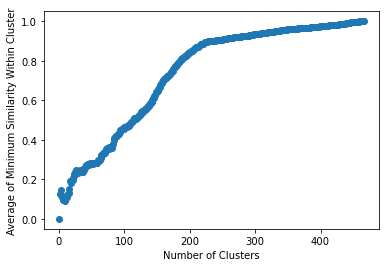

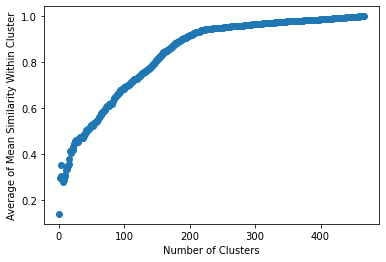

In [6]:
df, min_sims = determine_optimal_clustering_number(df, max_num_clusters = len(df))

In [7]:
min_sim_df = pd.DataFrame()
min_sim_df['clusters'] = list(range(1, len(df)+1))
min_sim_df['min_sim_within_cluster'] = min_sims
min_sim_df = min_sim_df[min_sim_df['min_sim_within_cluster'] > 0.5]
min_sim_df

,clusters,min_sim_within_cluster
114,115,0.509006
115,116,0.510593
116,117,0.506864
117,118,0.505787
118,119,0.509513
...,...,...
461,462,0.998912
462,463,0.998963
463,464,0.998966
464,465,1.000000


In [8]:
path = '../out/extended_set_predictions/'
folder = path + '114clusters/'
#os.mkdir(folder)
df, _ = extract_legends_and_plot(df, 'grp.png', folder, num_clusters = 114, name_col = 'Database')
df.to_csv(folder + 'finalmols.csv', index = False)

/Users/jackie16201/Desktop/Spring_2023/nontoxic_stat_phase_killing_abx/src/pred_utils.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['row_num'] = list(range(len(df)))


In [9]:
# pick highest scoring mol from each cluster

finaldf = pd.DataFrame()
for clust, smalldf in df.groupby('cluster'):
    smalldf = smalldf.sort_values('hit_kill', ascending = False)
    smalldf = pd.DataFrame(smalldf.iloc[0,:]).T
    finaldf = pd.concat([finaldf, smalldf])
finaldf.to_csv(folder + 'finalmols_best_from_each_cluster.csv', index = False)
finaldf

,SMILES,tanimoto similarity to closest train set,closest train set smiles,closest train set name,tanimoto similarity to closest abx,closest abx smiles,closest abx name,Database,hit_inh,hit_inh_epi_unc,hit_kill,hit_kill_epi_unc,row_num,cluster
11124,Cl.NCCC1=CC=C(C=C1)C1=C2C=C(F)C=C(F)C2=NC=C1,0.352459,CNc1ncc(cc1C)-c1ccc2c(c1C)n(cc(C(O)=O)c2=O)C1CC1,ozenoxacin,0.361153,CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(CCF)c3c2F)CC1,FLEROXACIN,MolPort,0.175703,0.01385,0.162105,0.008157,87,0
1951,OC1=C(C=C(Cl)C=C1Cl)S(=O)C1=C(O)C(Cl)=CC(Cl)=C1,0.25801,Oc1cc(Cl)ccc1Oc1ccc(Cl)cc1Cl,triclosan,0.293436,Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1,DAPSONE,MolPort,0.290916,0.05078,0.179463,0.015174,64,1
11369,CN(C)CC(C)(C)CNC(=O)C1=CN(CC2CCCCC2)C=C(C(=O)N...,0.416831,COc1c(c(cc2c1N(C=C(C(=O)O)C2=O)C1CC1)F)CN1CC[C...,BRD-K38903973,0.396972,CO/N=C1\CN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3C2CC2)...,GEMIFLOXACIN,MolPort,0.280031,0.033372,0.155815,0.012626,100,10
2781,Cl.Cl.ClC1=CC=C(COC2=CC=C(CNCC3CCNCC3)C=C2)C=C1,0.348031,CCCCCCCCCCCCCCCC[N+](C)(C)CCN(Cc1ccc(OC)cc1)c1...,thonzonium,0.341837,CC(C)(C)CC(C)(C)c1ccc(OCCOCC[N+](C)(C)Cc2ccccc...,BENZETHONIUM,MolPort,0.045927,0.001149,0.139041,0.006674,168,100
7733,CN(C)C[C@@H]1CN(C)C[C@H]1NC(=O)C1=C(F)C=CC(F)=C1,0.337829,COc1c(c(cc2c1N(C=C(C(=O)O)C2=O)C1CC1)F)CN1CC[C...,BRD-K38903973,0.321807,CCOc1ccc2ccccc2c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(...,NAFCILLIN,MolPort,0.311463,0.035943,0.120141,0.00636,270,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,[Cl-].COC1=C(OC)C=C2C([NH2+]CCC2=C1)C1=CC=C(Br...,0.371769,CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc12,sertraline,0.358889,COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC,TRIMETHOPRIM,MolPort,0.122333,0.011262,0.135677,0.008642,183,95
7630,Cl.[2H]C([2H])([2H])C([2H])(NCC(O)COC1=CC=C(O)...,0.345387,CC(C)(Cc1ccc2ccccc2c1)NC[C@@H](O)COc1cccc(Cl)c...,NPS-2143,0.260516,CC(O)C(=O)O.CCOc1ccc2nc3cc(N)ccc3c(N)c2c1,ETHACRIDINE LACTATE,MolPort,0.033862,0.002846,0.102514,0.015003,438,96
11018,Cl.Cl.N[C@H]1CC[C@H](CC1)NC1CCN(CC1)C1=CC(F)=C...,0.252119,CCCC[P+](CCCC)(CCCC)Cc1ccc(cc1)NC(=O)[C@@H](Cc...,BRD-K80694030,0.333741,CC(=O)NC[C@H]1CN(c2ccc(N3CCOCC3)c(F)c2)C(=O)O1,LINEZOLID,MolPort,0.200047,0.030312,0.193166,0.01788,46,97
11008,Cl.Cl.NCCC1=CC=C(CNCC2=CC(CO)=CC=C2)C=C1,0.287009,CCCCCCCCCCCCCCCC[N+](C)(C)Cc1ccccc1,benzyldimethylhexadecylammonium,0.287009,CCCCCCCCCCCCC[N+](C)(C)Cc1ccccc1,BENZALKONIUM,MolPort,0.069032,0.005394,0.152553,0.008908,117,98


# Part 4: annotate, literature search, pick final mols

In [10]:
df = pd.read_excel(folder + 'ANNOTATED_finalmols_best_from_each_cluster.xlsx')
df = df[df['Order'] == 'Y']
df

,Notes,Order,SMILES,tanimoto similarity to closest train set,closest train set smiles,closest train set name,tanimoto similarity to closest abx,closest abx smiles,closest abx name,Database,hit_inh,hit_inh_epi_unc,hit_kill,hit_kill_epi_unc,hit,row_num,cluster
2,no prior reported antibacterial activity,Y,CN(C)CC(C)(C)CNC(=O)C1=CN(CC2CCCCC2)C=C(C(=O)N...,0.416831,COc1c(c(cc2c1N(C=C(C(=O)O)C2=O)C1CC1)F)CN1CC[C...,BRD-K38903973,0.396972,CO/N=C1\CN(c2nc3c(cc2F)c(=O)c(C(=O)O)cn3C2CC2)...,GEMIFLOXACIN,MolPort,0.280031,0.033372,0.155815,0.012626,0.155815,100,10
3,no prior reported antibacterial activity,Y,Cl.Cl.ClC1=CC=C(COC2=CC=C(CNCC3CCNCC3)C=C2)C=C1,0.348031,CCCCCCCCCCCCCCCC[N+](C)(C)CCN(Cc1ccc(OC)cc1)c1...,thonzonium,0.341837,CC(C)(C)CC(C)(C)c1ccc(OCCOCC[N+](C)(C)Cc2ccccc...,BENZETHONIUM,MolPort,0.045927,0.001149,0.139041,0.006674,0.139041,168,100
4,no prior reported antibacterial activity,Y,CN(C)C[C@@H]1CN(C)C[C@H]1NC(=O)C1=C(F)C=CC(F)=C1,0.337829,COc1c(c(cc2c1N(C=C(C(=O)O)C2=O)C1CC1)F)CN1CC[C...,BRD-K38903973,0.321807,CCOc1ccc2ccccc2c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(...,NAFCILLIN,MolPort,0.311463,0.035943,0.120141,0.006360,0.120141,270,101
5,no prior reported antibacterial activity,Y,Cl.Cl.CNC1=C(F)C=NC(=N1)N1C[C@H](C2CC2)[C@H](C...,0.423841,COc1cc2nc(nc(NC3CCN(Cc4ccccc4)CC3)c2cc1OC)N1CC...,BIX-01294,0.368869,N[C@H]1[C@@H]2CN(c3nc4c(cc3F)c(=O)c(C(=O)O)cn4...,TROVAFLOXACIN,MolPort,0.256701,0.035887,0.142046,0.017064,0.142046,152,102
7,no prior reported antibacterial activity,Y,FC1=CC(CNC(=O)C2=CN(CC3=CC=CC=C3)C=C(C(=O)NC3C...,0.451488,COc1c(c(cc2c1N(C=C(C(=O)O)C2=O)C1CC1)F)CN1CC[C...,BRD-K38903973,0.425373,C[C@H]1COc2c(C3(N)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,PAZUFLOXACIN,MolPort,0.201171,0.016404,0.110264,0.004069,0.110264,350,104
8,no prior reported antibacterial activity,Y,Cl.Cl.OCC(CO)NC([C@H]1C[C@H](O)C1)C1CCNCC1,0.333992,[H][C@@]1(CC[C@@]2([H])[C@]3([H])[C@H](O)C[C@@...,trodusquemine,0.260274,CCC(C)CCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=O)N[C...,COLISTINE,MolPort,0.079549,0.005455,0.159436,0.016843,0.159436,90,105
9,no prior reported antibacterial activity,Y,FC1=CC=C(CCNC(=O)C2=CN(CC3=CC=CC=C3)C=C(C(=O)N...,0.415045,COc1c(c(cc2c1N(C=C(C(=O)O)C2=O)C1CC1)F)CN1CC[C...,BRD-K38903973,0.397243,C[C@H]1COc2c(C3(N)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,PAZUFLOXACIN,MolPort,0.238789,0.021972,0.156570,0.009873,0.156570,96,106
10,no prior reported antibacterial activity,Y,Cl.FC1=CC=C(C=C1)C1CCCNC2=C1C=CC(F)=C2,0.352558,OCCNCCNc1ccc(NCCNCCO)c2C(=O)c3c(O)ccc(O)c3C(=O...,mitoxantrone,0.371705,CCN1CC(C(=O)O)C(=O)c2cc(F)c(N3CCNCC3)cc21,NaN,MolPort,0.116904,0.006019,0.168313,0.008099,0.168313,79,107
11,no prior reported antibacterial activity,Y,COCC1(CNCc2ccc3c(ccn3C)c2)CCC1,0.394850,CC(C)CCNC[C@@H](O)Cn1c2ccccc2c2ccccc12,BRD-A87865091,0.368275,CCC(C)CCCCC(=O)N[C@@H](CCNC(=O)n1ccc2ccccc21)C...,TETRA INDOLE ALDEHYDE POLYMYXIN B,ChemBridge Express,0.080694,0.006059,0.109554,0.008155,0.109554,360,108
15,no prior reported antibacterial activity,Y,Cl.Cl.NC1CC(C1)C1=NC(N)=NC(NCCC2=CC=C(F)C=C2)=C1,0.331195,COc1cc2nc(nc(NC3CCN(Cc4ccccc4)CC3)c2cc1OC)N1CC...,BIX-01294,0.329442,COc1ccc(C[C@H](N)C(=O)N[C@@H]2[C@@H](CO)O[C@@H...,PUROMYCIN HYDROCHLORIDE,MolPort,0.128558,0.006080,0.142591,0.006847,0.142591,149,111


too similar 4 12


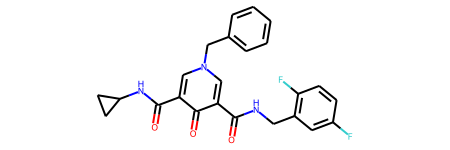

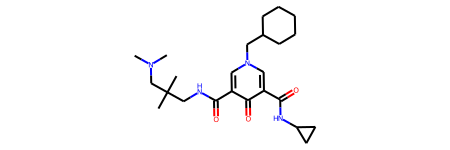

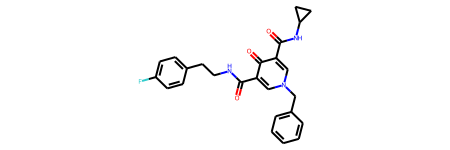

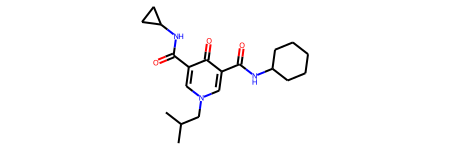

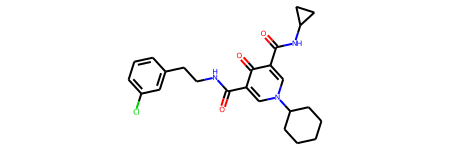

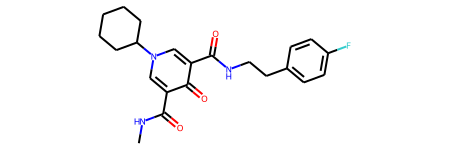

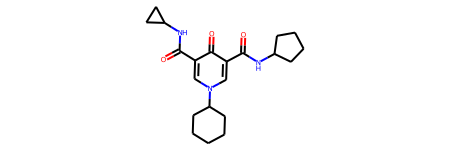

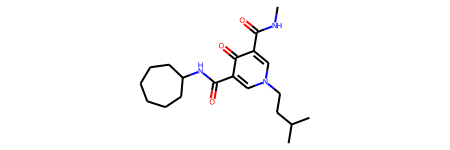

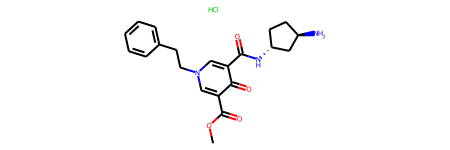

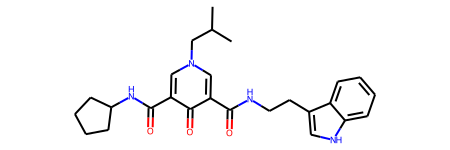

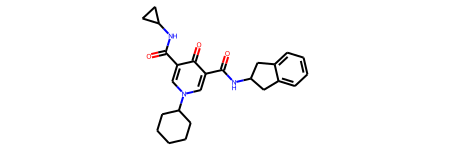

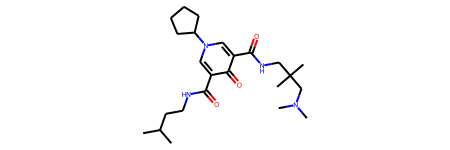

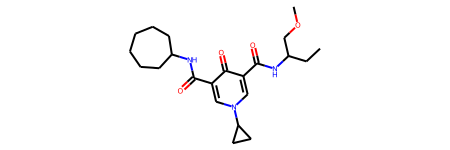

too similar 0 12


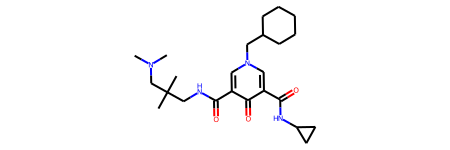

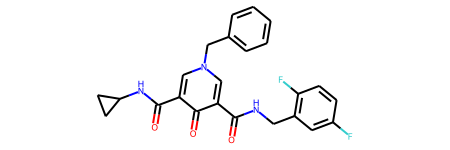

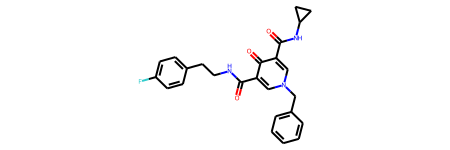

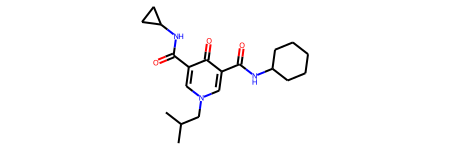

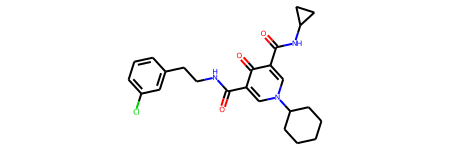

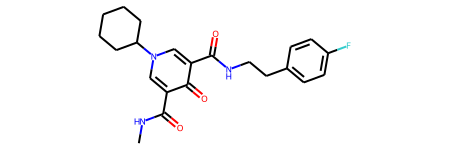

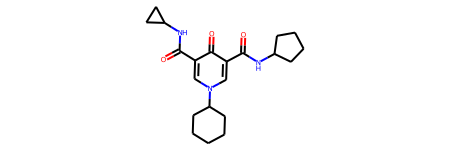

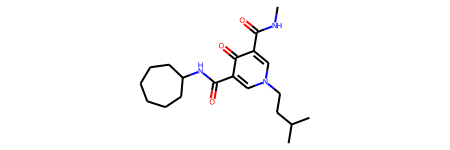

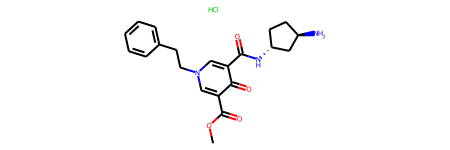

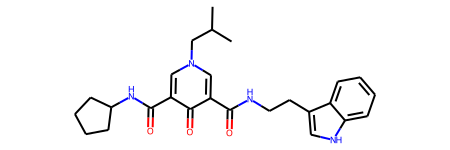

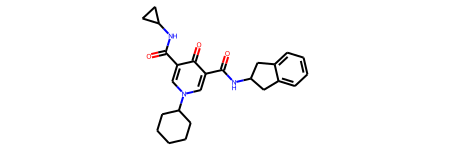

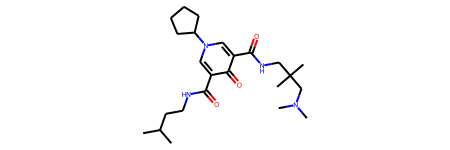

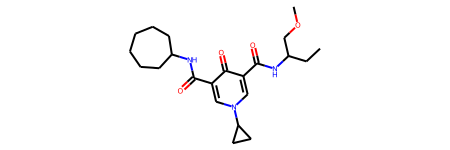

too similar 6 12


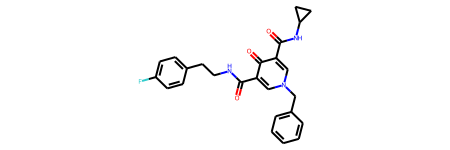

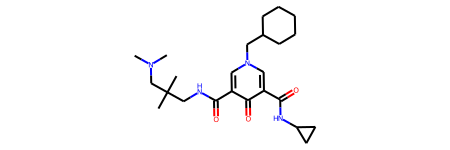

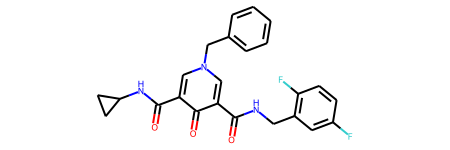

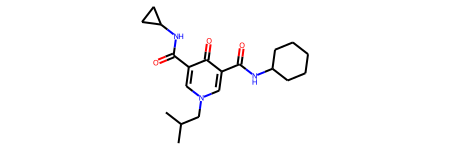

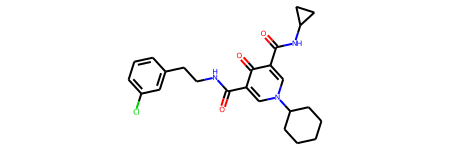

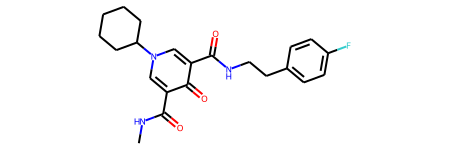

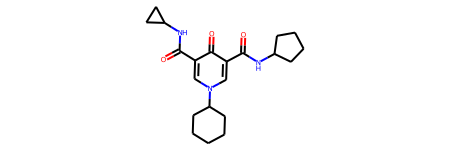

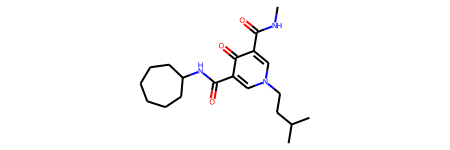

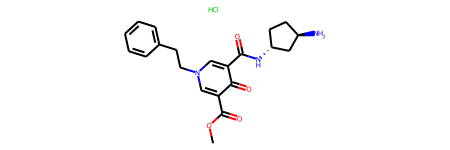

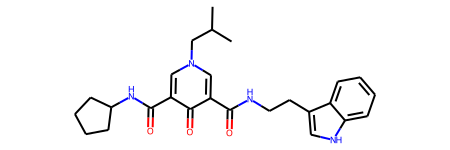

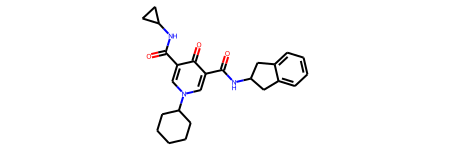

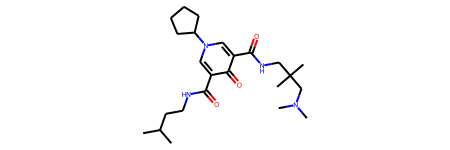

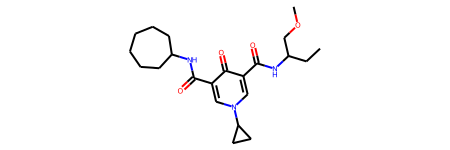

too similar 17 12


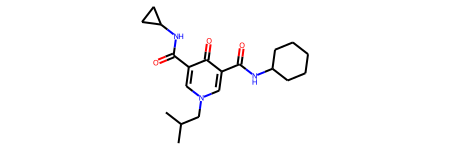

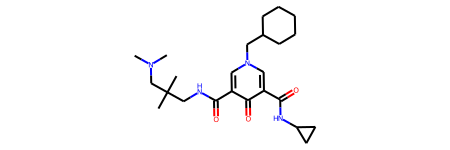

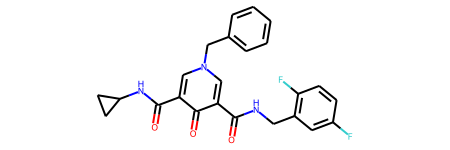

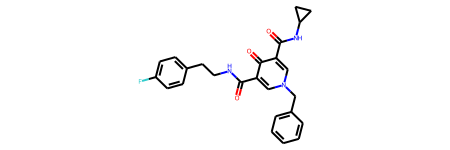

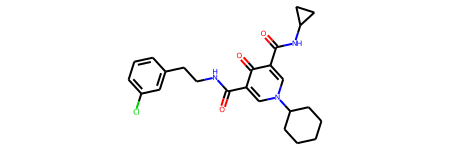

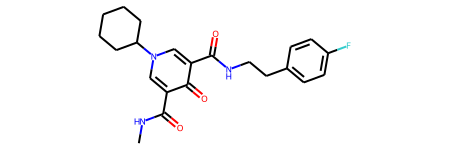

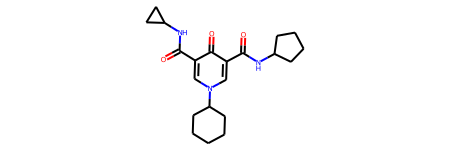

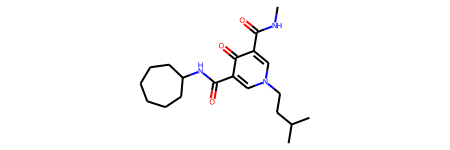

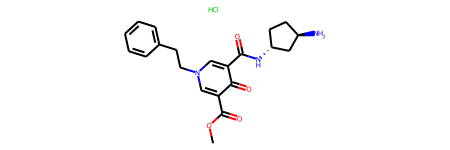

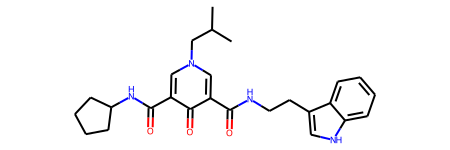

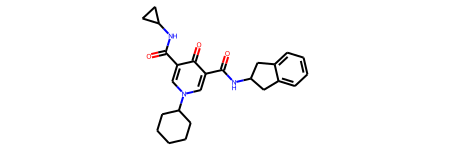

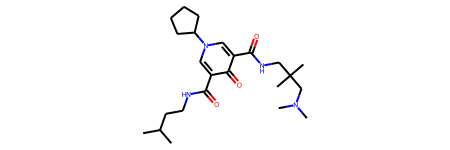

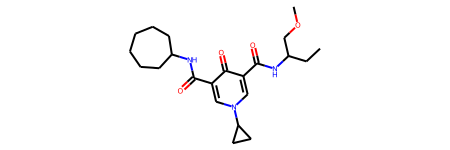

too similar 25 12


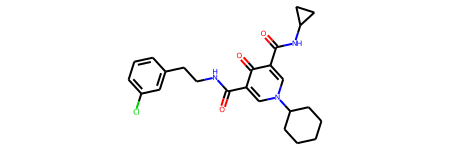

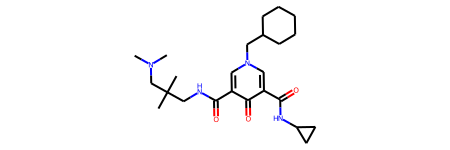

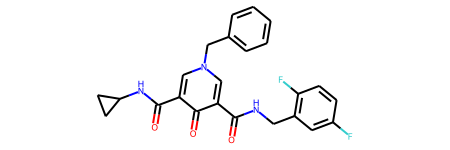

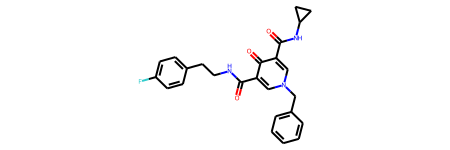

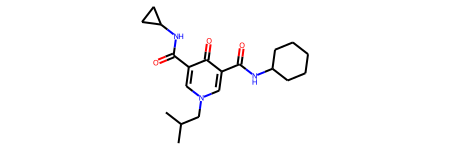

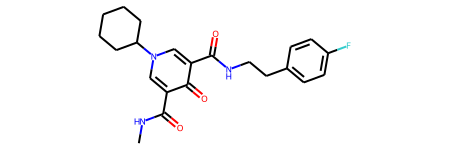

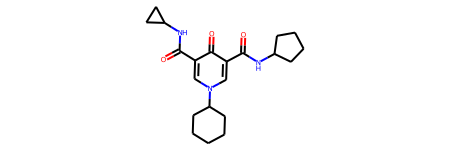

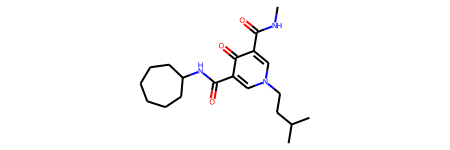

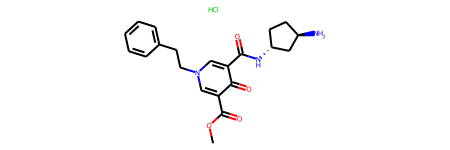

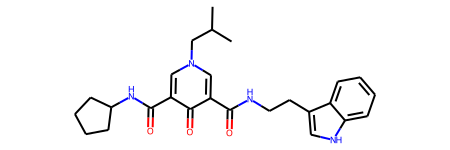

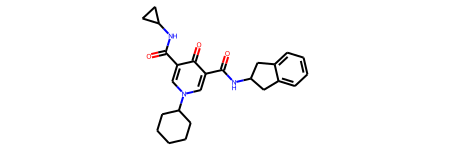

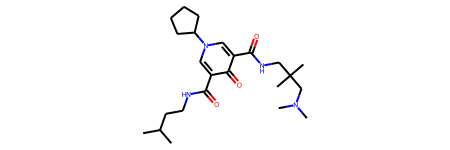

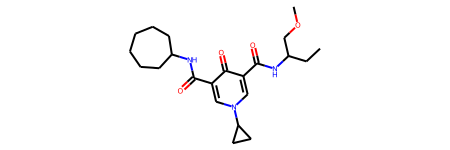

too similar 26 12


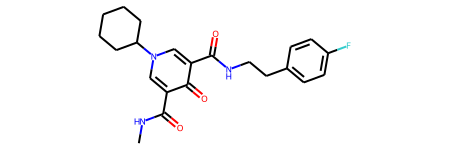

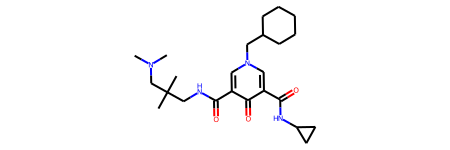

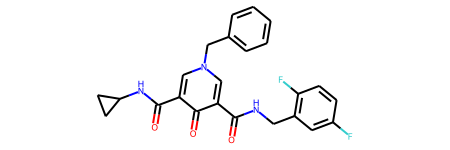

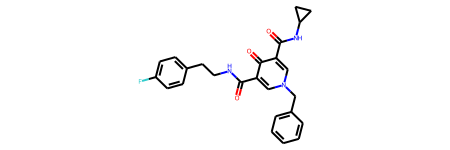

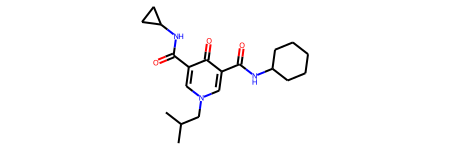

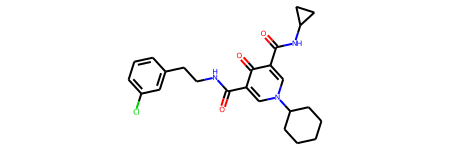

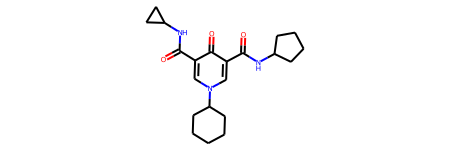

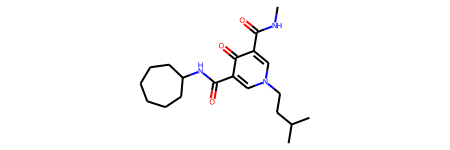

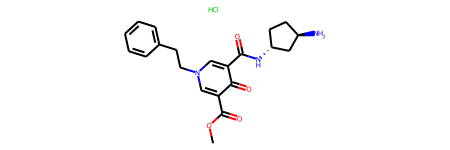

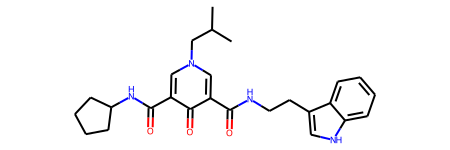

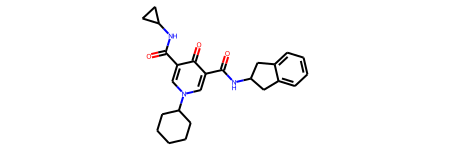

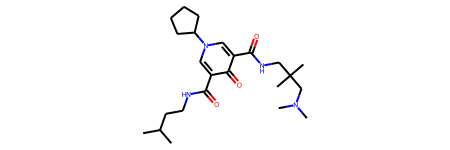

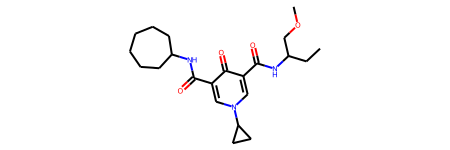

too similar 30 12


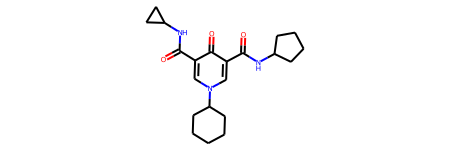

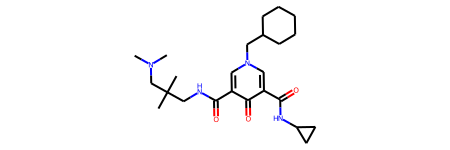

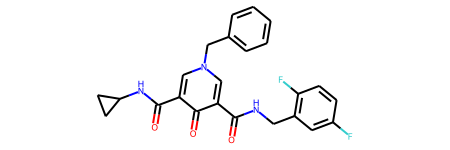

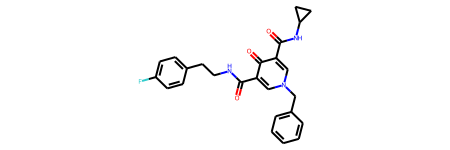

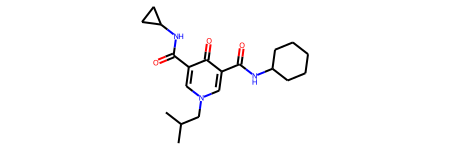

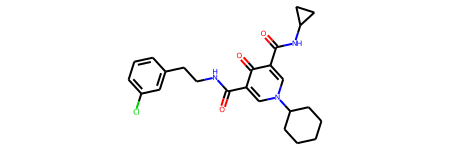

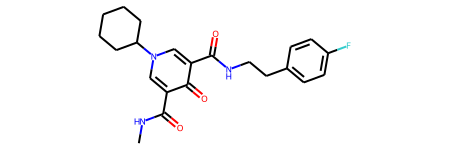

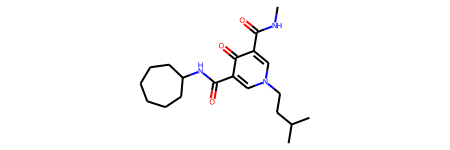

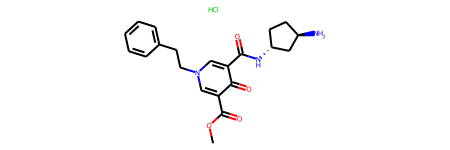

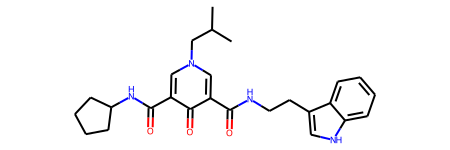

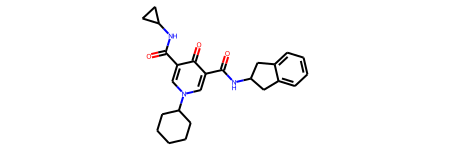

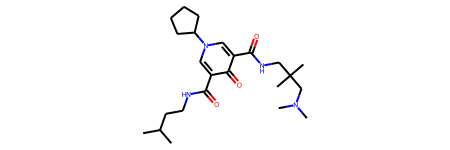

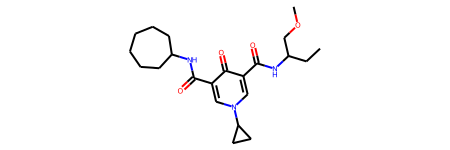

too similar 33 12


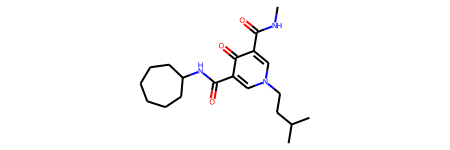

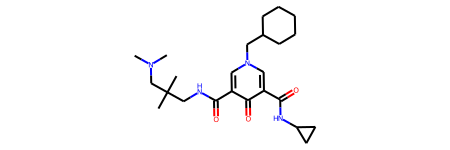

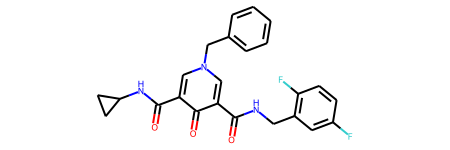

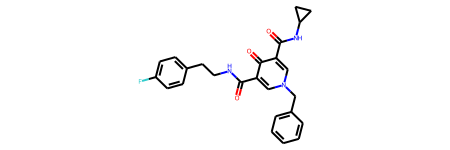

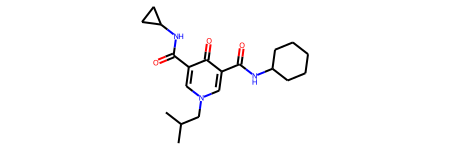

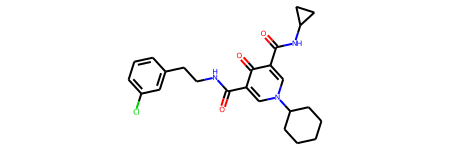

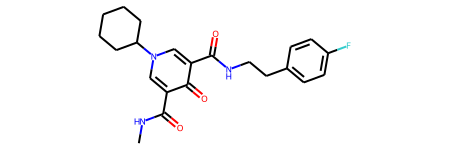

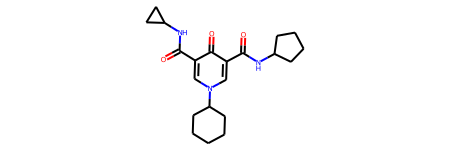

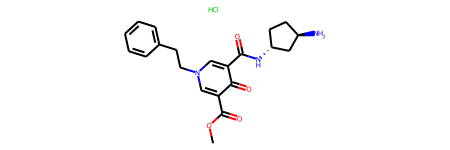

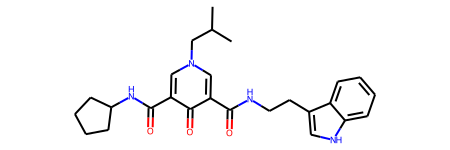

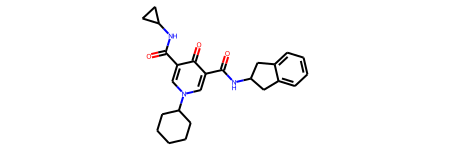

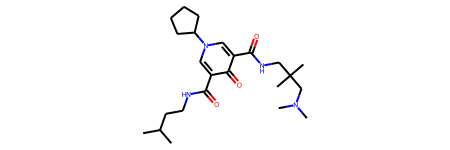

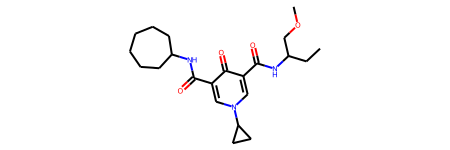

too similar 35 12


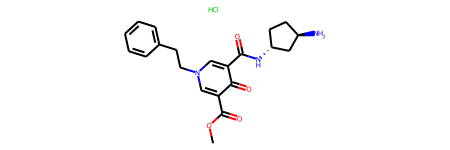

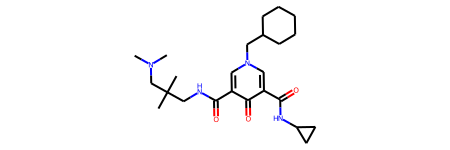

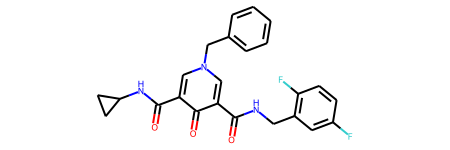

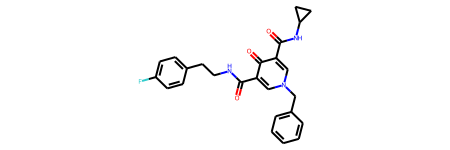

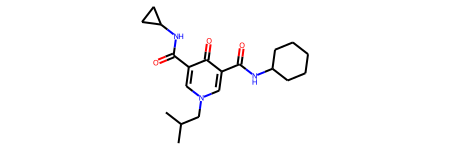

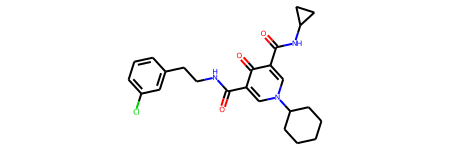

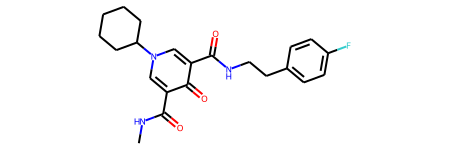

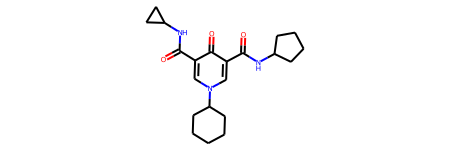

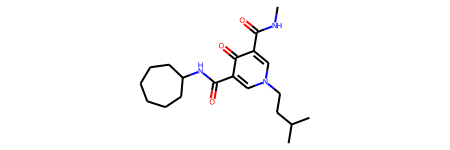

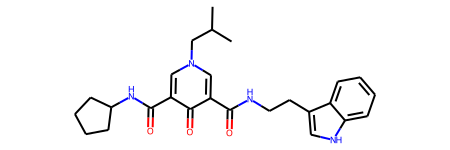

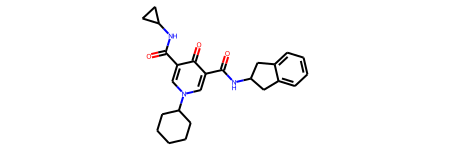

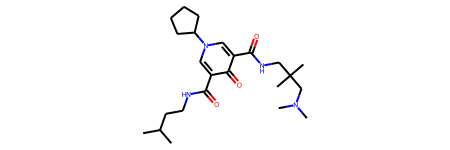

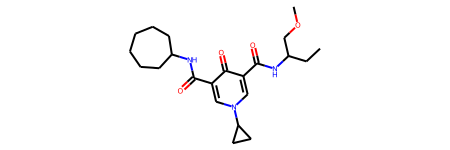

too similar 36 12


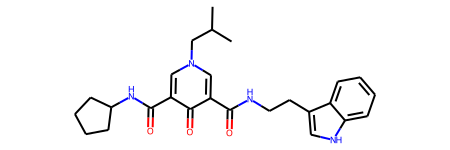

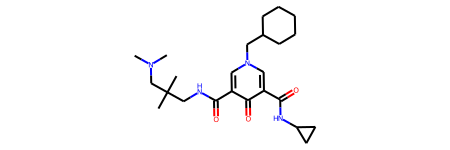

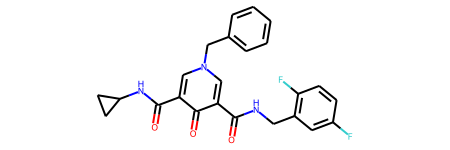

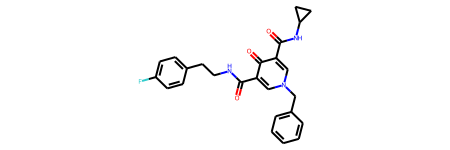

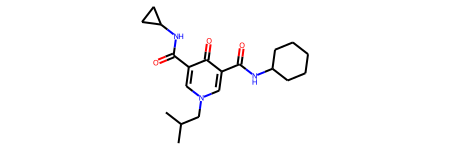

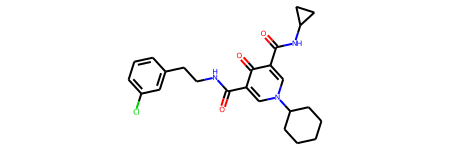

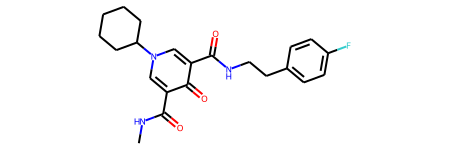

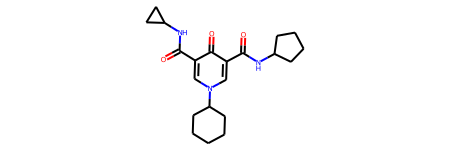

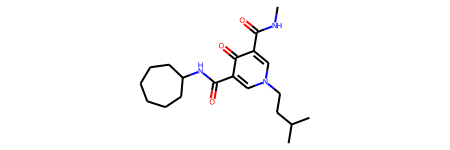

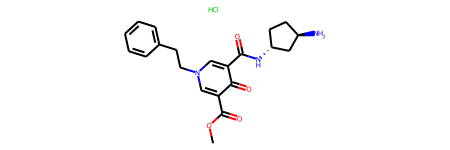

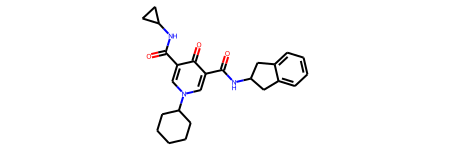

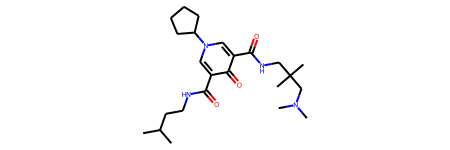

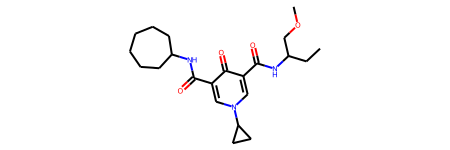

too similar 43 12


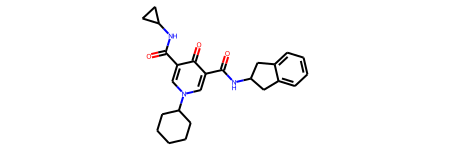

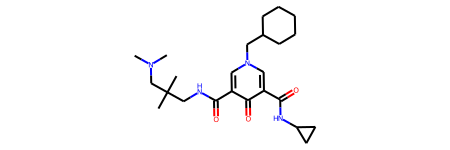

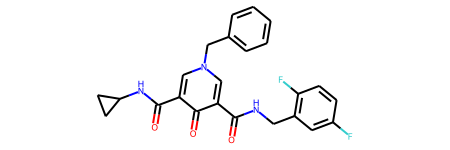

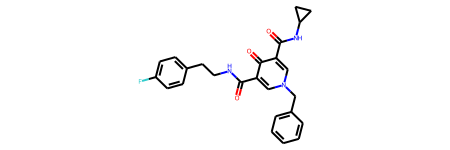

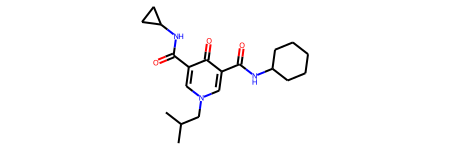

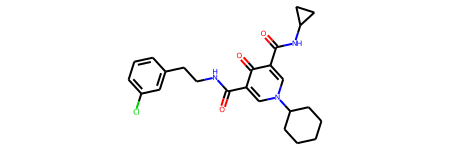

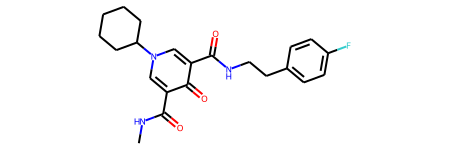

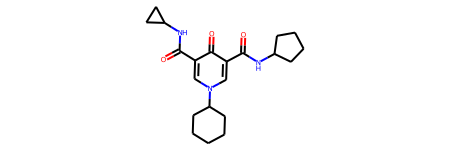

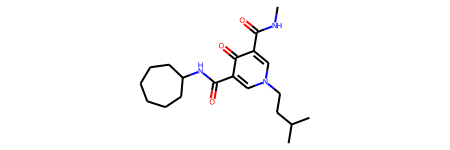

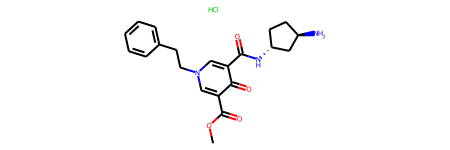

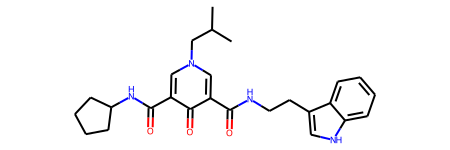

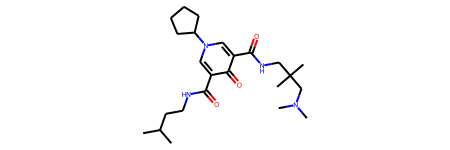

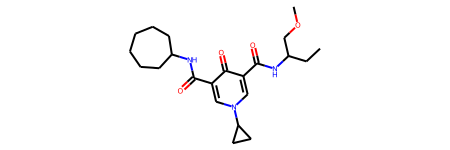

too similar 51 12


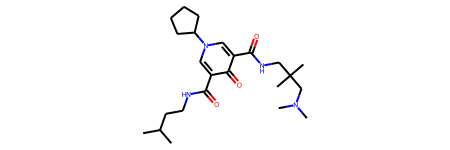

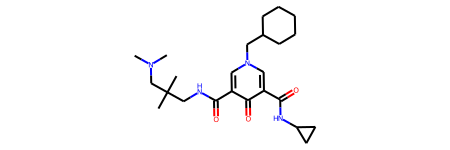

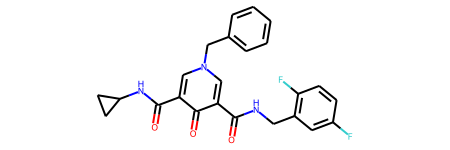

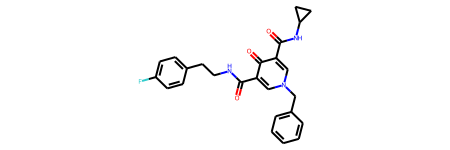

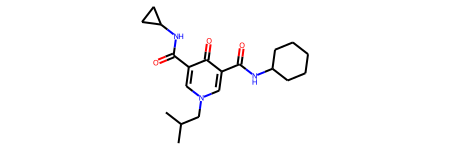

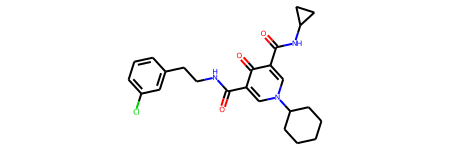

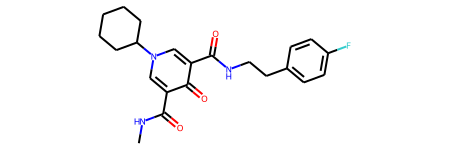

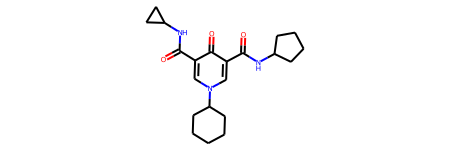

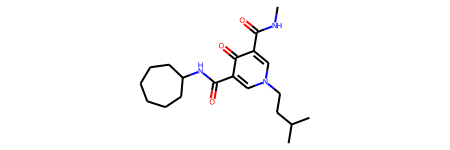

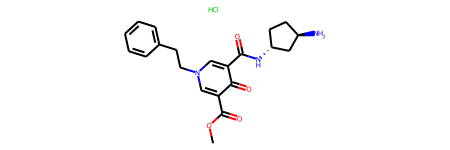

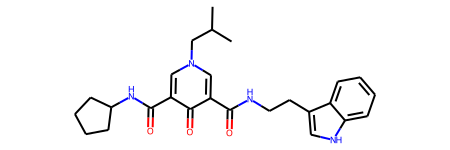

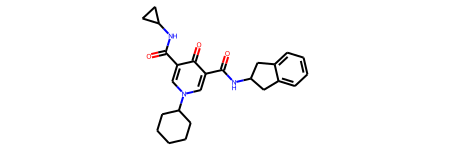

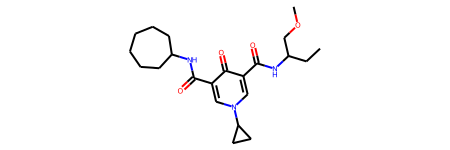

too similar 54 12


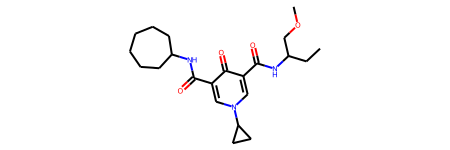

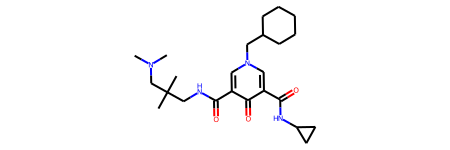

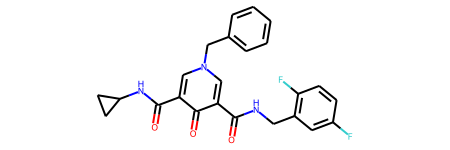

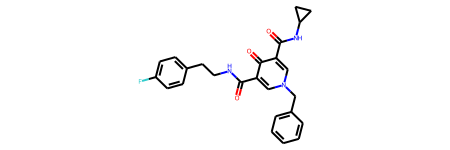

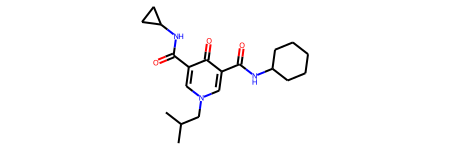

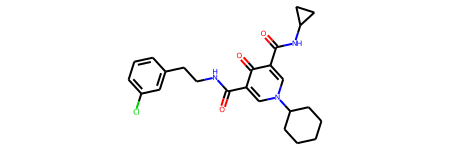

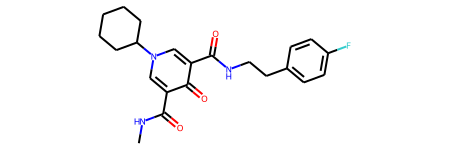

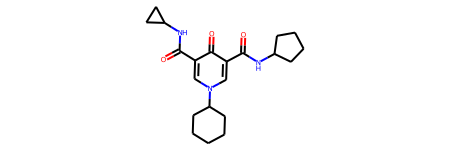

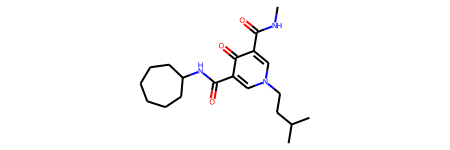

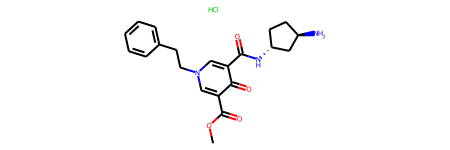

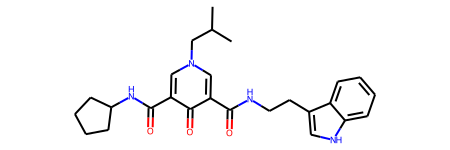

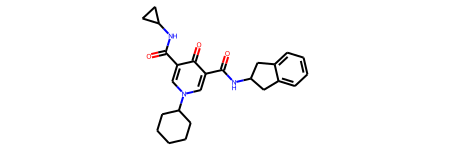

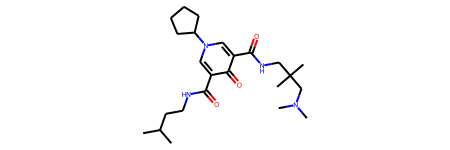

too similar 44 1


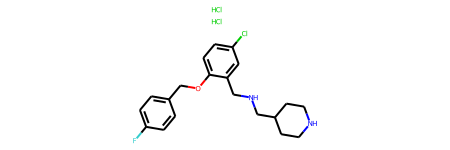

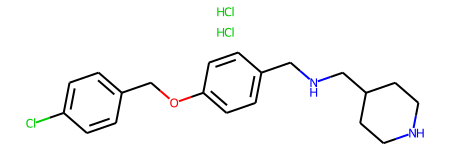

too similar 1 1


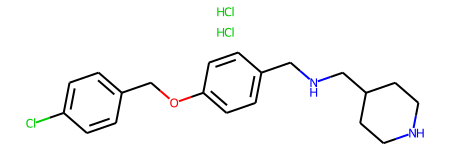

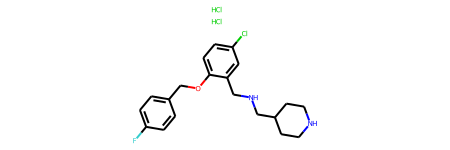

too similar 29 3


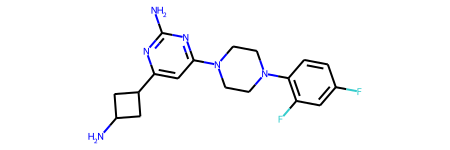

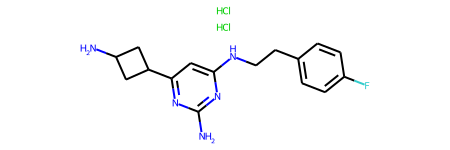

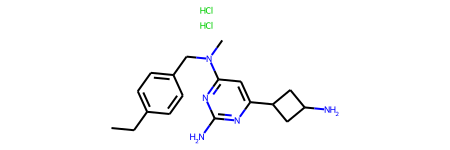

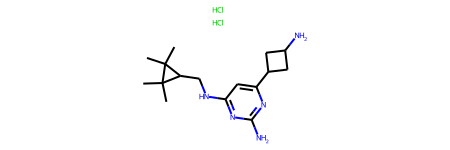

too similar 9 3


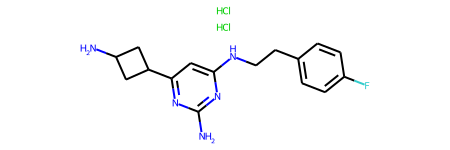

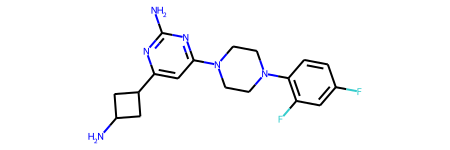

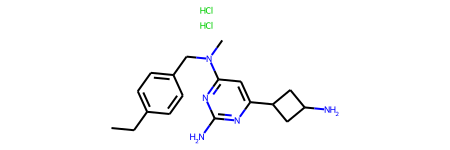

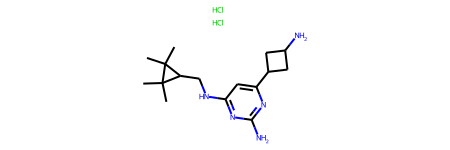

too similar 38 3


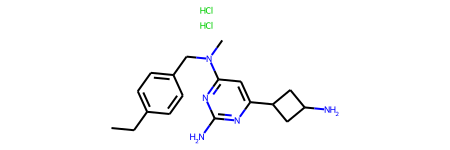

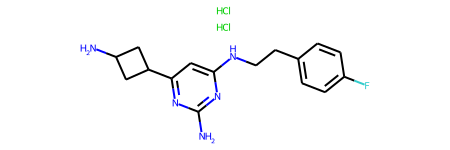

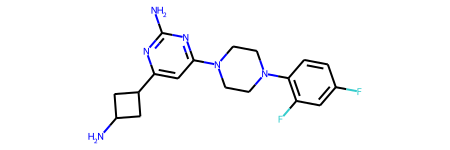

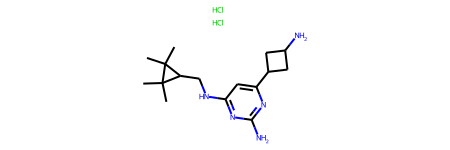

too similar 45 3


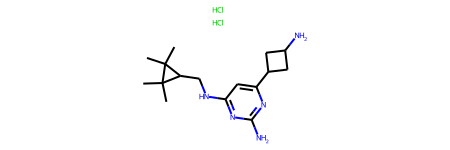

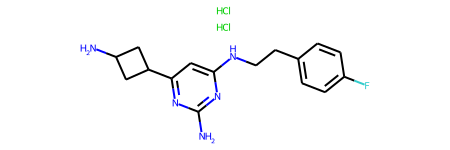

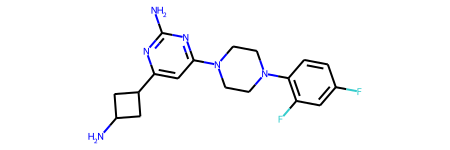

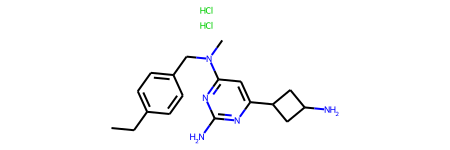

too similar 18 1


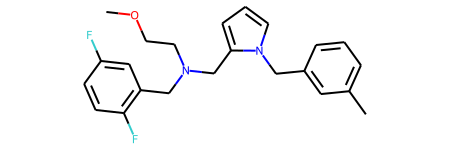

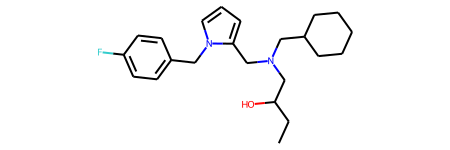

too similar 13 1


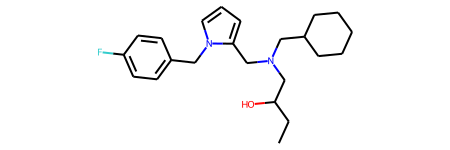

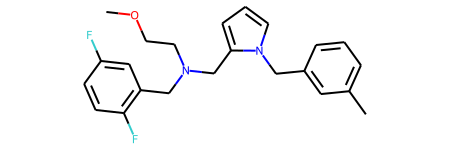

too similar 39 1


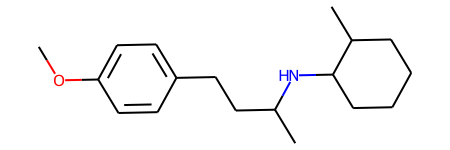

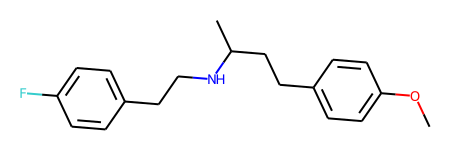

too similar 16 1


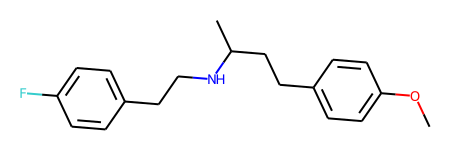

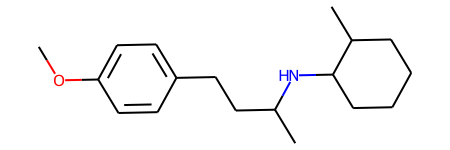

too similar 28 2


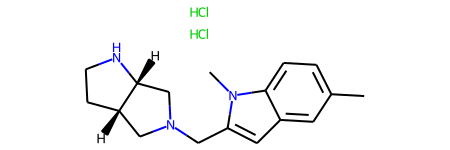

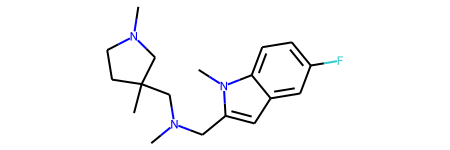

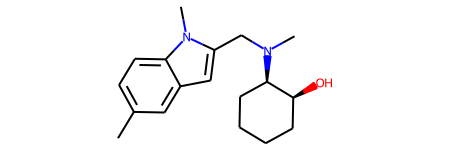

too similar 20 2


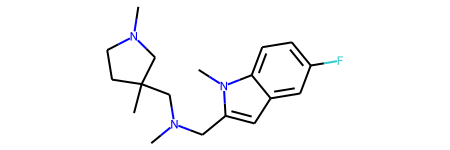

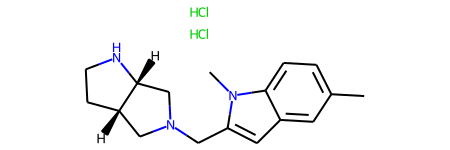

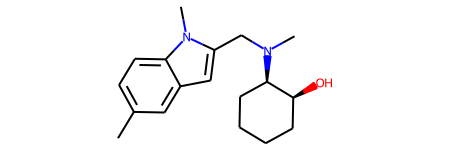

too similar 49 2


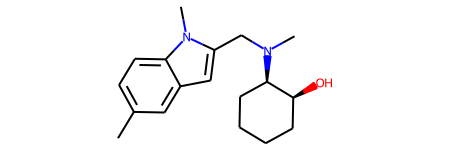

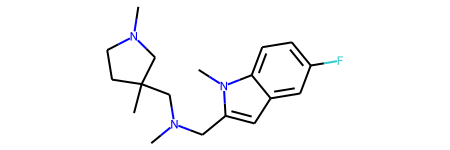

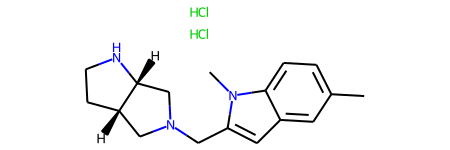

too similar 58 1


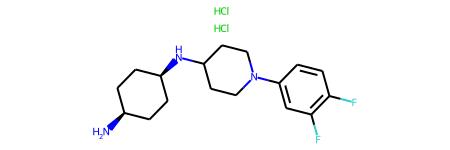

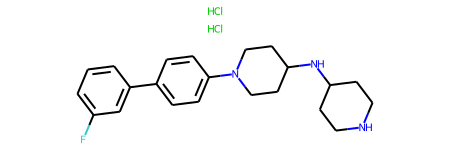

too similar 21 1


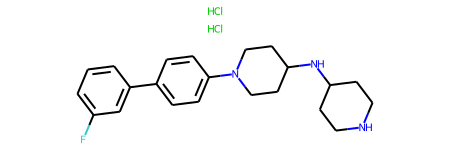

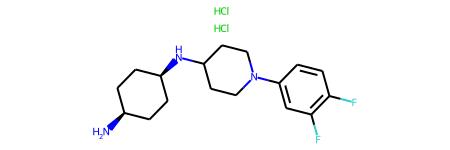

too similar 37 2


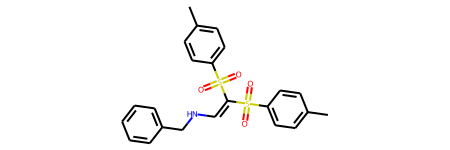

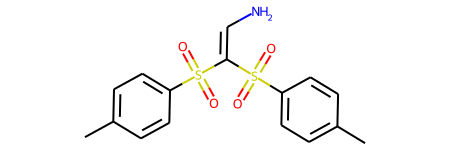

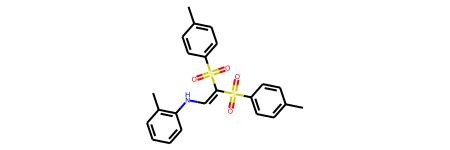

too similar 34 2


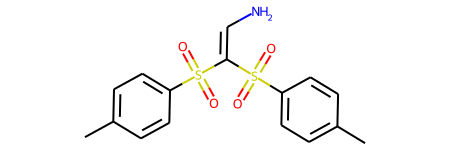

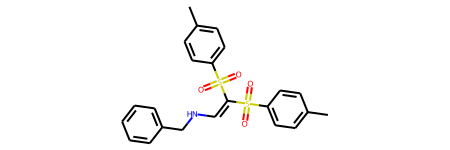

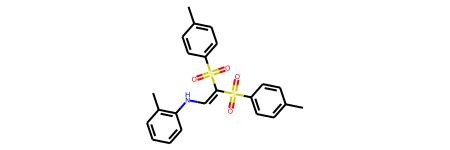

too similar 41 2


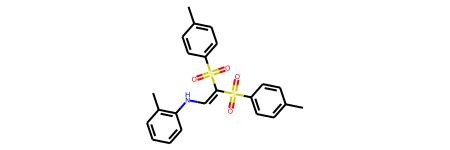

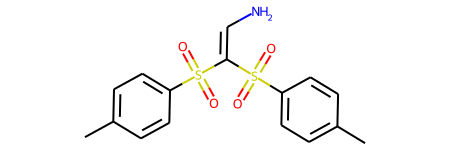

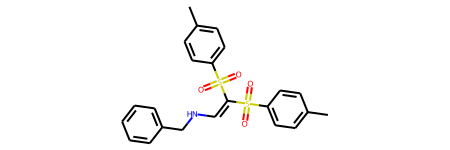

In [11]:
finalmols = [Chem.MolFromSmiles(smi) for smi in list(df['SMILES'])]
finalfps = [Chem.RDKFingerprint(m) for m in finalmols]
tans = [DataStructs.BulkTanimotoSimilarity(i, finalfps) for i in finalfps]
simdict = {}
j = 0
for m, tan in zip(finalmols, tans):
    for i, t in enumerate(tan):
        if j == i:
            continue
        if t > 0.5:
            if i not in simdict:
                simdict[i] = [j]
            else:
                currlist = simdict[i]
                if j not in currlist:
                    currlist.append(j)
                    simdict[i] = currlist
            if j not in simdict:
                simdict[j] = [i]
            else:
                currlist = simdict[j]
                if i not in currlist:
                    currlist.append(i)
                    simdict[j] = currlist               
    j = j + 1
    
for key, val in simdict.items():
    print('too similar', key, len(val))
    display(finalmols[key])
    for j in val:
        display(finalmols[j])

In [12]:
# manually go through and choose one that matches the most to represent the matching ones
discard_indices = []
representative_keep_indices = [17, 9, 28, 34, 1, 18, 16, 21]
for key, val in simdict.items():
    discard_indices.append(key)
    for j in val:
        discard_indices.append(j)
discard_indices = list(set(discard_indices))

savedf = df[[i in representative_keep_indices for i in range(len(df))]]
df = df[[i not in discard_indices for i in range(len(df))]]
df = pd.concat([df, savedf])
df

,Notes,Order,SMILES,tanimoto similarity to closest train set,closest train set smiles,closest train set name,tanimoto similarity to closest abx,closest abx smiles,closest abx name,Database,hit_inh,hit_inh_epi_unc,hit_kill,hit_kill_epi_unc,hit,row_num,cluster
4,no prior reported antibacterial activity,Y,CN(C)C[C@@H]1CN(C)C[C@H]1NC(=O)C1=C(F)C=CC(F)=C1,0.337829,COc1c(c(cc2c1N(C=C(C(=O)O)C2=O)C1CC1)F)CN1CC[C...,BRD-K38903973,0.321807,CCOc1ccc2ccccc2c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(...,NAFCILLIN,MolPort,0.311463,0.035943,0.120141,0.006360,0.120141,270,101
5,no prior reported antibacterial activity,Y,Cl.Cl.CNC1=C(F)C=NC(=N1)N1C[C@H](C2CC2)[C@H](C...,0.423841,COc1cc2nc(nc(NC3CCN(Cc4ccccc4)CC3)c2cc1OC)N1CC...,BIX-01294,0.368869,N[C@H]1[C@@H]2CN(c3nc4c(cc3F)c(=O)c(C(=O)O)cn4...,TROVAFLOXACIN,MolPort,0.256701,0.035887,0.142046,0.017064,0.142046,152,102
8,no prior reported antibacterial activity,Y,Cl.Cl.OCC(CO)NC([C@H]1C[C@H](O)C1)C1CCNCC1,0.333992,[H][C@@]1(CC[C@@]2([H])[C@]3([H])[C@H](O)C[C@@...,trodusquemine,0.260274,CCC(C)CCCC(=O)N[C@@H](CCN)C(=O)N[C@H](C(=O)N[C...,COLISTINE,MolPort,0.079549,0.005455,0.159436,0.016843,0.159436,90,105
10,no prior reported antibacterial activity,Y,Cl.FC1=CC=C(C=C1)C1CCCNC2=C1C=CC(F)=C2,0.352558,OCCNCCNc1ccc(NCCNCCO)c2C(=O)c3c(O)ccc(O)c3C(=O...,mitoxantrone,0.371705,CCN1CC(C(=O)O)C(=O)c2cc(F)c(N3CCNCC3)cc21,NaN,MolPort,0.116904,0.006019,0.168313,0.008099,0.168313,79,107
11,no prior reported antibacterial activity,Y,COCC1(CNCc2ccc3c(ccn3C)c2)CCC1,0.394850,CC(C)CCNC[C@@H](O)Cn1c2ccccc2c2ccccc12,BRD-A87865091,0.368275,CCC(C)CCCCC(=O)N[C@@H](CCNC(=O)n1ccc2ccccc21)C...,TETRA INDOLE ALDEHYDE POLYMYXIN B,ChemBridge Express,0.080694,0.006059,0.109554,0.008155,0.109554,360,108
16,no prior reported antibacterial activity,Y,CN(C)C1=C(CC2=C(N(C)C)N(C)C3=CC=CC=C23)C2=CC=C...,0.445448,CNc1ncc(cc1C)-c1ccc2c(c1C)n(cc(C(O)=O)c2=O)C1CC1,ozenoxacin,0.447632,Cc1c(F)c(N2CCNC(C)C2)cc2c1c(=O)c(C(=O)O)cn2C1CC1,GREPAFLOXACIN,MolPort,0.070717,0.003282,0.194237,0.022586,0.194237,45,112
17,no prior reported antibacterial activity,Y,O=C(NC(NC(C(F)=C1)=C(F)C=C1F)=O)C2=C(OC)C(Cl)=...,0.388298,Nc1nc(c(F)cc1F)-n1cc(C(O)=O)c(=O)c2cc(F)c(N3CC...,delafloxacin,0.409489,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(=O)c(c5o...,RIFALAZIL,MayBridge,0.376718,0.041328,0.120660,0.003725,0.120660,265,113
18,prior reported antibacterial activity for comp...,Y,Cl.[2H]C([2H])(NC([2H])([2H])C(O)C1CCC2=CC(F)=...,0.401369,[H][C@@]12Cc3c(F)cc(NC(=O)CN4CCCC4)c(O)c3C(=O)...,eravacycline,0.404324,CN(C)[C@@H]1C(O)=C(C(=O)NCN[C@H]2[C@H](O)O[C@H...,MEGLUCYCLINE,MolPort,0.103030,0.010524,0.183150,0.018232,0.183150,55,12
23,no prior reported antibacterial activity,Y,CC1=CC=C2N1C=CN1C=C(C=C21)C1=CC=C(C)C=C1,0.385239,Fc1cc(cc(F)c1CN1CCOCC1)-c1cccc2ncc(nc12)-c1cnn...,NVP-BSK805,0.348597,CNc1ncc(-c2ccc3c(=O)c(C(=O)O)cn(C4CC4)c3c2C)cc1C,OZENOXACIN,MolPort,0.111979,0.011137,0.236418,0.022359,0.236418,18,17
25,no prior reported antibacterial activity,Y,CN1C(=CC2=C1C1=C(C=CC=C1)N2CC1CC1)C(O)=O,0.459577,C[C@H]1NCc2cc(ccc12)-c1ccc2c(c1OC(F)F)n(cc(C(O...,garenoxacin,0.474897,CC(C)Cn1cnc2c(N)nc3ccccc3c21,IMIQUIMOD,MolPort,0.202439,0.031340,0.122047,0.011168,0.122047,256,19


In [13]:
# now downselect from there
finalfolder = folder + 'finalset/'
#os.mkdir(finalfolder)
df, _ = extract_legends_and_plot(df, 'grp.png', finalfolder, num_clusters = 30, name_col = 'Database')
df.to_csv(finalfolder + 'finalmols.csv', index = False)
df.to_csv(folder + '37mols_after_deduplicating.csv', index = False)

# Part 5: check for analogues within the 800K from these final 37 since it is easier and faster to order from 800K library

In [ ]:
broad = pd.read_csv('../data/PublicStructures.txt', sep = '\t')
broad_mols = [Chem.MolFromSmiles(smi) for smi in broad['SMILES']]

keep_indices = [m is not None for m in broad_mols]
broad_mols = [m for i,m in enumerate(broad_mols) if keep_indices[i]]
broad = broad[keep_indices]
broad_fps = [Chem.RDKFingerprint(mol) for mol in broad_mols]
broad_names = list(broad['Name'])

df = pd.read_csv(folder + '37mols_after_deduplicating.csv')
df_mols = [Chem.MolFromSmiles(smi) for smi in df['SMILES']]
df_fps = [Chem.RDKFingerprint(mol) for mol in df_mols]

In [ ]:
for i, m1 in enumerate(df_mols):
    fp1 = df_fps[i]
    tans = DataStructs.BulkTanimotoSimilarity(fp1, broad_fps)
    for j, tan in enumerate(tans):
        if tan > 0.9 and tan < 0.95:
            print('similar', i)
            display(df_mols[i])
            display(broad_mols[j])
            print(broad_names[j])
        if tan >= 0.95:
            print('identical or close to it')
            display(df_mols[i], i)
            display(broad_mols[j])
            print(broad_names[j])
            

In [ ]:
discardnums = [0, 14, 34]
df = df[[i not in discardnums for i in range(len(df))]]
df

In [ ]:
df.to_csv(folder + '34mols_after_deduplicating_and_checking_for_Broad.csv', index = False)